In [7]:
import molsysmt as msm
import obinding as obin
import pyunitwizard as puw

In [2]:
molecular_system = obin.systems.demo()

In [3]:
msm.info(molecular_system, element='component')

index,n atoms,n groups,chain index,molecule index,molecule type,entity index,entity name
0,1727,110,0,0,protein,0,Barnase
1,1432,89,1,1,protein,1,Barstar


In [4]:
molecular_complex = obin.MolecularComplex(molecular_system)

In [5]:
U12 = obin.potential_energy.get_binding_potential_energy(molecular_complex)

In [6]:
U12

-3198.2333984375 <Unit('kilojoule / mole')>

In [8]:
U12_groups = obin.potential_energy.get_binding_potential_energy(molecular_complex, per_groups=True)

In [11]:
U12_1_groups= U12_groups.sum(axis=1)
U12_2_groups= U12_groups.sum(axis=0)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

/home/diego/Myopt/miniconda3/envs/OBinding@uibcdf_3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:709: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.array(x, subok=True, copy=copy)


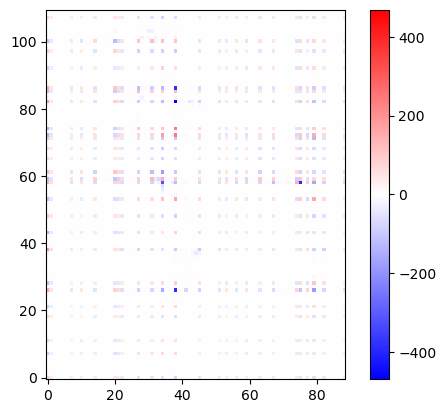

In [10]:
vtop = puw.get_value(max(abs(U12_groups.min()), abs(U12_groups.max())))

plt.imshow(U12_groups, origin='lower', cmap='bwr', vmin=-vtop, vmax=vtop)
plt.colorbar()
plt.show()

In [12]:
aux = [ii for ii in msm.pyunitwizard.get_value(U12_1_groups)]
aux += [ii for ii in msm.pyunitwizard.get_value(U12_2_groups)]
aux = np.array(aux)
max_abs_val = max(abs(aux.min()), abs(aux.max()))

view = msm.view(molecular_system)
view.clear()
view.add_cartoon(selection='all')
msm.thirds.nglview.color_by_value(view, aux, min_value= -max_abs_val, max_value= max_abs_val, cmap='bwr')
view

NGLWidget()